In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 2. 시스템 폰트 가져오기 (처음 한 번만 실행하면 됨)
# font_import()  # 이 작업은 시간이 좀 걸립니다

# 3. 폰트 로드
loadfonts()



다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 already registered with pdfFont().

cmr10 already registered with pdfFont().

cmsy10 already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Condensed already registered with pdfFont().

DejaVu Sans Light already registered with pdfFont().

esint10 already registered with pdfFont().

eufm10 already registered with pdfFont().

Liberation Mono already registered with pdfFont().

msam10 already registered with pdfFont().

msbm10 already registered with pdfFont().

rsfs10 already registered with pdfFont().

stmary10 already registered with pdfFont().

wasy10 a

In [18]:
source <- "GS"

# Step 1. Load relationship information data

In [19]:
# 방법 1: paste0() 사용
df_rel_info <- read.csv(
    paste0("/data/jerrylee/pjt/BIGFAM.v.2.0/data/", source, "/relationship_information/relatives.formatted.info"),
    sep="\t"
)

head(df_rel_info)

,DOR,rcode,relationship,volid,relid,volage,relage,volsex,relsex,Erx
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,1,SB,daughter-sister,18826,21244,50,36,F,F,0.7500000
2,1,SB,different-sex-sibling,34422,23884,33,35,F,M,0.3535534
3,1,PC,daughter-mother,79198,67531,66,44,F,F,0.5000000
4,1,SB,daughter-sister,20399,67531,38,44,F,F,0.7500000
5,1,SB,daughter-sister,67267,67531,43,44,F,F,0.7500000
6,1,PC,daughter-mother,79198,67267,66,43,F,F,0.5000000


In [20]:
dim(df_rel_info)

[1] 38006    10

In [21]:
# df_rel_info <- df_rel_info %>% filter((volid == 54887) | (relid == 54887))
# df_rel_info

# Step 2. remove duplicate relative id row

In [22]:
# 데이터프레임 복사 및 volid/relid 스왑
df_flip <- df_rel_info
df_flip$volid <- df_rel_info$relid
df_flip$relid <- df_rel_info$volid

# 두 데이터프레임 합치기
df_flip_and_concat <- rbind(
    df_rel_info[, c("DOR", "rcode", "relationship", "volid", "relid")],
    df_flip[, c("DOR", "rcode", "relationship", "volid", "relid")]
)

# pair 열 생성 (pmap을 사용하여 각 행의 volid와 relid를 정렬)
df_flip_and_concat <- df_flip_and_concat %>%
    mutate(pair = pmap_chr(list(volid, relid), 
           ~paste(sort(c(..1, ..2)), collapse = "_")))

# pair 기준으로 중복 제거
df_flip_and_concat_unique <- df_flip_and_concat %>%
    distinct(pair, .keep_all = TRUE)

# # pair 열 제거
# df_flip_and_concat_unique <- df_flip_and_concat_unique %>%
#     select(-pair)

In [23]:
# # 방법 1: 중복된 pair들의 모든 정보 확인
# duplicated_pairs <- df_flip_and_concat %>%
#     group_by(pair) %>%
#     filter(n() > 1) %>%
#     arrange(pair)

# duplicated_pairs

In [24]:
head(df_flip_and_concat_unique)

,DOR,rcode,relationship,volid,relid,pair
,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,1,SB,daughter-sister,18826,21244,18826_21244
2,1,SB,different-sex-sibling,34422,23884,23884_34422
3,1,PC,daughter-mother,79198,67531,67531_79198
4,1,SB,daughter-sister,20399,67531,20399_67531
5,1,SB,daughter-sister,67267,67531,67267_67531
6,1,PC,daughter-mother,79198,67267,67267_79198


In [25]:
# volid와 relid의 합집합 구하기
n_ids <- union(
    unique(df_flip_and_concat_unique$volid),
    unique(df_flip_and_concat_unique$relid)
)

n_pairs <- unique(df_flip_and_concat_unique$pair)

# 합집합의 크기 출력
length(n_ids)
length(n_pairs)


[1] 18006

[1] 28797

In [26]:
df_flip <- df_flip_and_concat_unique
df_flip$volid <- df_flip_and_concat_unique$relid
df_flip$relid <- df_flip_and_concat_unique$volid

# 두 데이터프레임 합치기
df_flip_and_concat <- rbind(
    df_flip_and_concat_unique[, c("DOR", "rcode", "relationship", "volid", "relid")],
    df_flip[, c("DOR", "rcode", "relationship", "volid", "relid")]
)


In [27]:
df_flip_and_concat

DOR,rcode,relationship,volid,relid
<int>,<chr>,<chr>,<int>,<int>
1,SB,daughter-sister,18826,21244
1,SB,different-sex-sibling,34422,23884
1,PC,daughter-mother,79198,67531
1,SB,daughter-sister,20399,67531
1,SB,daughter-sister,67267,67531
1,PC,daughter-mother,79198,67267
1,SB,daughter-sister,20399,67267
1,PC,daughter-mother,79198,20399
1,SB,different-sex-sibling,37463,47358


# Step 3. check number of relatives per volid

In [28]:
plot_relatives_distribution <- function(df_rel_counts, 
                                      output_path = NULL,
                                      title = NULL,
                                      width = 6,
                                      height = 4,
                                      dpi = 300) {
    
    library(ggplot2)
    library(dplyr)
    library(scales)
    
    # Calculate cumulative percentages
    total_volunteers <- nrow(df_rel_counts)
    rel_counts <- table(df_rel_counts$relid)
    cumulative_percent <- cumsum(rel_counts) / total_volunteers * 100
    cumulative_df <- data.frame(
        relid = as.numeric(names(cumulative_percent)),
        cumulative = cumulative_percent
    )
    
    # 히스토그램 데이터 계산
    hist_data <- hist(df_rel_counts$relid, 
                     breaks = seq(0.5, max(df_rel_counts$relid) + 0.5, by = 1), 
                     plot = FALSE)
    max_count <- max(hist_data$counts)
    y_max <- max_count * 1.05
    max_x <- max(df_rel_counts$relid)
    x_breaks <- pretty(c(0, max_x), n = 10)  # n=10으로 설정하여 약 10개의 눈금 생성
    
    # Create plot
    p <- ggplot() +
        # Histogram
        geom_histogram(data = df_rel_counts, 
                      aes(x = relid), 
                      breaks = seq(0.5, max(df_rel_counts$relid) + 0.5, by = 1),
                      fill = "grey80", 
                      color = "white") +
        # Cumulative line
        geom_line(data = cumulative_df, 
                  aes(x = relid, y = cumulative * max_count/100, 
                      color = "Cumulative %"), 
                  linewidth = 0.8) +
        geom_point(data = cumulative_df, 
                   aes(x = relid, y = cumulative * max_count/100,
                       color = "Cumulative %"), 
                   size = 1.5) +
        # Scales and labels
        scale_x_continuous(
            breaks = x_breaks,
            limits = c(0, max_x),
            expand = c(0, 0)
        ) +
        scale_y_continuous(
            name = "# of samples",
            limits = c(0, y_max),
            sec.axis = sec_axis(~. * 100/max_count, 
                               name = "Cumulative %"),
            expand = c(0, 0)
        ) +
        scale_color_manual(values = c("Cumulative %" = "#E41A1C")) +
        labs(
            title = title,
            x = "# of relatives"
        ) +
        theme_classic() +
        theme(
            text = element_text(size = 8),
            axis.title = element_text(size = 8),
            axis.text = element_text(size = 8, color = "black"),
            axis.title.y.left = element_text(color = "black"),
            axis.title.y.right = element_text(color = "black"),
            axis.text.y.right = element_text(color = "black"),
            legend.position = c(0.5, 1.0),
            legend.title = element_blank(),
            legend.background = element_blank(),
            legend.key = element_blank(),
            legend.direction = "horizontal",
            legend.text = element_text(size = 8),
            plot.tag = element_text(face = "bold", size = 0),
            plot.margin = margin(t = 3, r = 1, b = 1, l = 1)
        )
    
    # Save plot if output_path is provided
    if (!is.null(output_path)) {
        ggsave(output_path, p, width = width, height = height, dpi = dpi)
    }
    
    return(p)
}

## Step 3.1. all cohort

In [29]:
df_rel_counts <- df_flip_and_concat %>%
    group_by(volid) %>%
    summarise(relid = n()) %>%
    arrange(desc(relid))

# df_rel_counts

In [33]:
df_flip_and_concat

DOR,rcode,relationship,volid,relid
<int>,<chr>,<chr>,<int>,<int>
1,SB,daughter-sister,18826,21244
1,SB,different-sex-sibling,34422,23884
1,PC,daughter-mother,79198,67531
1,SB,daughter-sister,20399,67531
1,SB,daughter-sister,67267,67531
1,PC,daughter-mother,79198,67267
1,SB,daughter-sister,20399,67267
1,PC,daughter-mother,79198,20399
1,SB,different-sex-sibling,37463,47358


In [34]:
df_degree <- df_flip_and_concat %>%
        filter(relationship == "daughter-mother")

# 친척 수 계산
df_rel_counts_degree <- df_degree %>%
    group_by(volid) %>%
    summarise(relid = n()) %>%
    arrange(desc(relid))
    

total_volunteers <- nrow(df_rel_counts_degree)
rel_counts <- table(df_rel_counts_degree$relid)
cumulative_percent <- cumsum(rel_counts) / total_volunteers * 100
cumulative_df <- data.frame(
    relid = as.numeric(names(cumulative_percent)),
    cumulative = cumulative_percent
)

cumulative_df %>% head(10)


,relid,cumulative
,<dbl>,<dbl>
1,1,85.13061
2,2,97.82317
3,3,99.71534
4,4,99.96651
6,6,99.98326
7,7,100.00000


Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


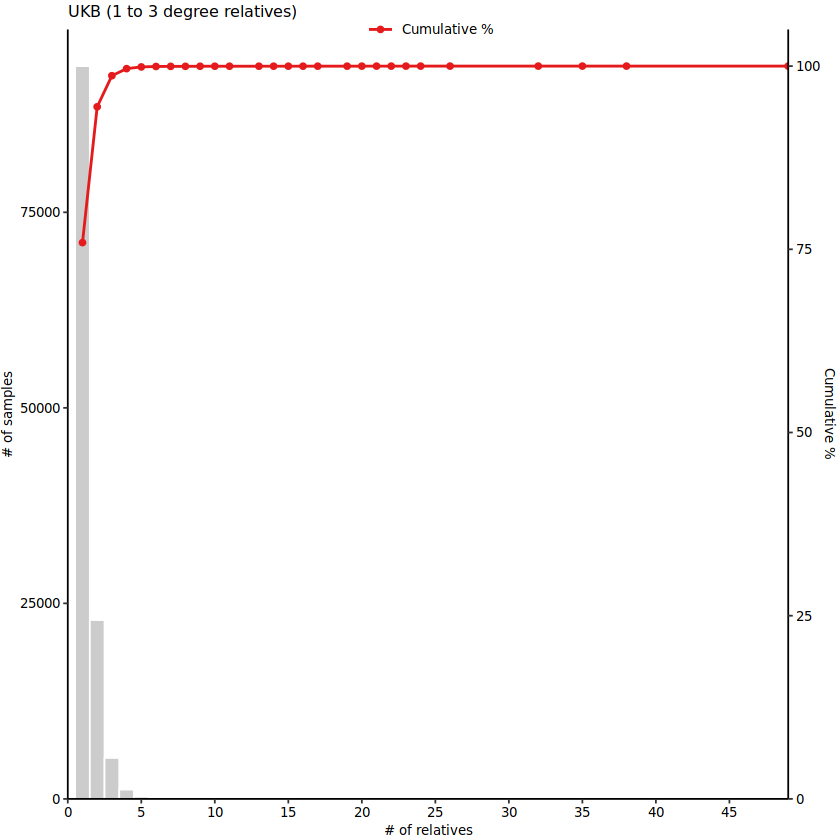

In [84]:
p <- plot_relatives_distribution(
    df_rel_counts, 
    title = "UKB (1 to 3 degree relatives)",)
print(p)

# 파일 저장과 함께 사용
output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/", 
    source, 
    ".demographics.all_D.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 85,
    height = 38,
    units = "mm",
    dpi = 300
)

In [85]:
# 1. DOR별 분포 그래프
# DOR별로 데이터 나누고 각각 플롯 생성
for (degree in 1:3) {
    # 해당 degree의 데이터만 필터링
    df_degree <- df_flip_and_concat %>%
        filter(DOR == degree)
    
    # 친척 수 계산
    df_rel_counts_degree <- df_degree %>%
        group_by(volid) %>%
        summarise(relid = n()) %>%
        arrange(desc(relid))
    
    # 플롯 생성 및 저장
    output_path <- paste0(
        "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/", 
        source, 
        ".demographics.degree", 
        degree,
        "_D.pdf"
    )
    
    p <- plot_relatives_distribution(
        df_rel_counts_degree, 
        title = paste0("UKB (", degree, " degree relatives)")
    )

    ggsave(
        filename = output_path,
        plot = p,
        width = 85,
        height = 38,
        units = "mm",
        dpi = 300
    )
}

Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


In [86]:
# 2. Relationship별 분포 그래프
# 주요 relationship 유형 추출
relationships <- unique(df_flip_and_concat$relationship)
length(relationships)
# for (rel in relationships) {
#     # 해당 relationship의 데이터만 필터링
#     df_rel <- df_flip_and_concat %>%
#         filter(relationship == rel)
    
#     # 친척 수 계산
#     df_rel_counts_rel <- df_rel %>%
#         group_by(volid) %>%
#         summarise(relid = n()) %>%
#         arrange(desc(relid))
    
#     # 최소 1개 이상의 데이터가 있는 경우에만 플롯 생성
#     if (nrow(df_rel_counts_rel) > 0) {
#         # 파일명에 사용할 수 있도록 relationship 문자열 처리
#         rel_filename <- gsub("[^[:alnum:]]", "_", rel)
        
#         output_path <- paste0(
#             "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/", 
#             source, 
#             ".demographics.", 
#             rel_filename,
#             "_D.pdf"
#         )
        
#         p <- plot_relatives_distribution(
#             df_rel_counts_rel,
#             output_path = output_path,
#             figure_tag = substr(rel, 1, 20), # relationship 이름이 너무 길 수 있으므로 잘라줌
#             width = 6,
#             height = 4,
#             dpi = 300
#         )
#         print(p)
#     }
# }

[1] 23